In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log_path = "/mnt/Media Drive/Academics/Thesis/MessageScheduler/data/2022-06-07 11-03-05/docker//docker-monitor.log"

docker_df = pd.read_csv(log_path)

In [3]:
docker_df.columns = [i.strip() for i in docker_df.columns]

In [4]:
d_df = docker_df.copy()

In [5]:
d_df

,time,pids,net_tx (MB),net_rx (MB),name,memory_usage (MB),cpu_user (s),cpu_system (s),blkio_write (MB),blkio_read (MB)
0,2022-06-07 10:15:14,23,0.000000,0.000757,kafka-jmx-exporter,32.046875,35925000,299376000,0.000000,5.933594
1,2022-06-07 10:15:16,2,0.000786,0.002895,database-scheduler,14.964844,19944000,83768000,0.058594,3.472656
2,2022-06-07 10:15:18,13,0.000698,0.003431,mysql,521.011719,1231435000,3952151000,234.882812,16.316406
3,2022-06-07 10:15:20,1,0.000000,0.003151,adminer,7.812500,10435000,26089000,0.000000,1.988281
4,2022-06-07 10:15:22,146,0.126255,0.163909,messagehandler,63.089844,122482000,669279000,0.000000,1.304688
...,...,...,...,...,...,...,...,...,...,...
1098,2022-06-07 11:02:56,1,9.942881,2.623720,adminer,17.367188,301314000,1230023000,0.324219,7.703125
1099,2022-06-07 11:02:58,146,36.654387,34.948533,messagehandler,64.906250,15227287000,111787597000,2.945312,3.406250
1100,2022-06-07 11:03:00,106,55.852511,61.826978,worker,20.339844,38425367000,282093765000,4.675781,10.683594
1101,2022-06-07 11:03:02,5,29.016503,26.265497,scheduler,38.863281,5155213000,29888885000,0.386719,9.558594


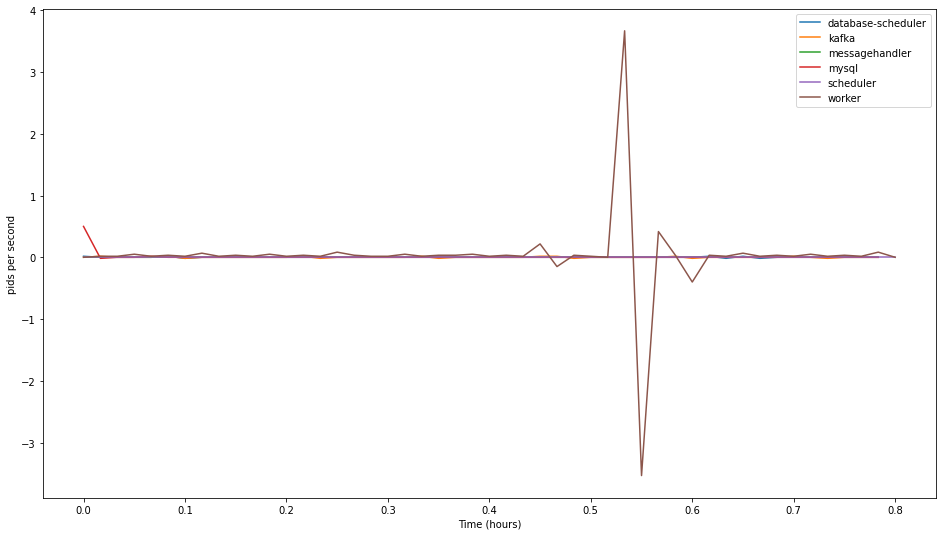

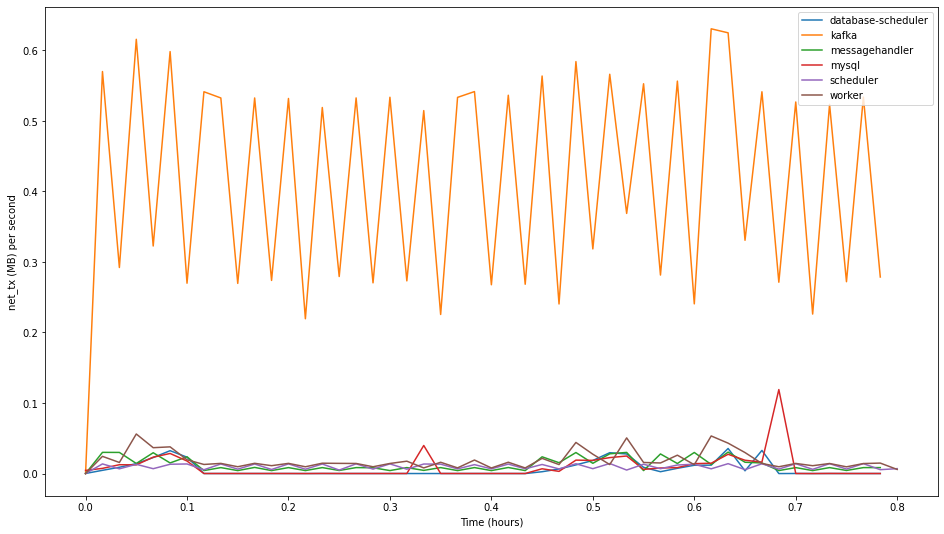

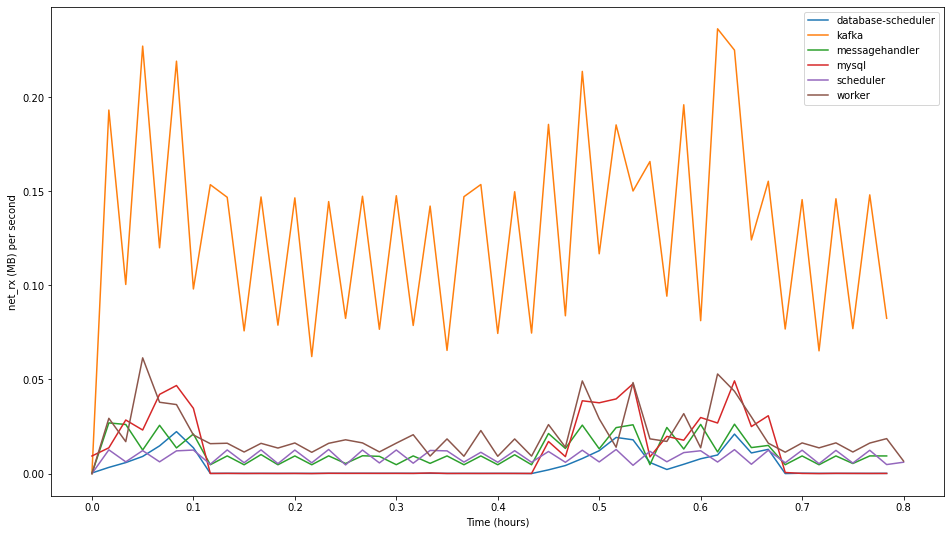

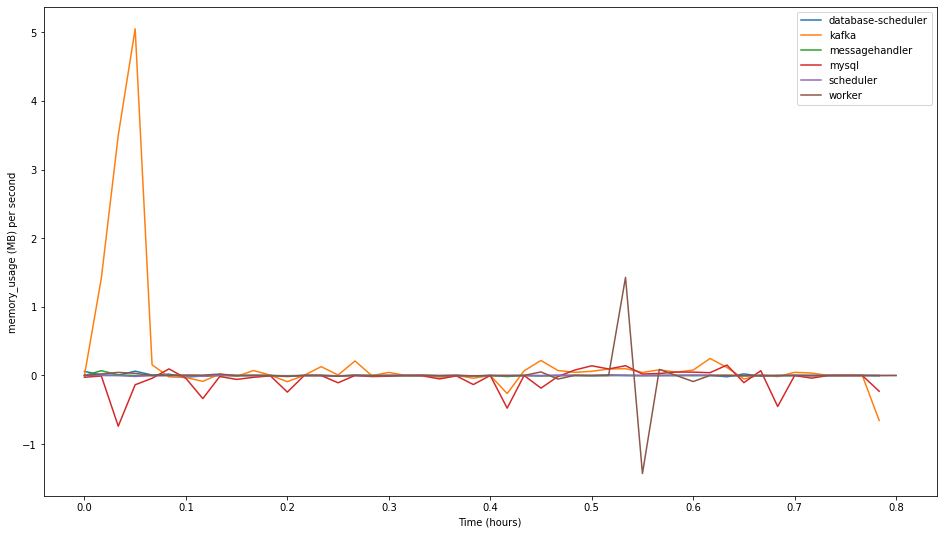

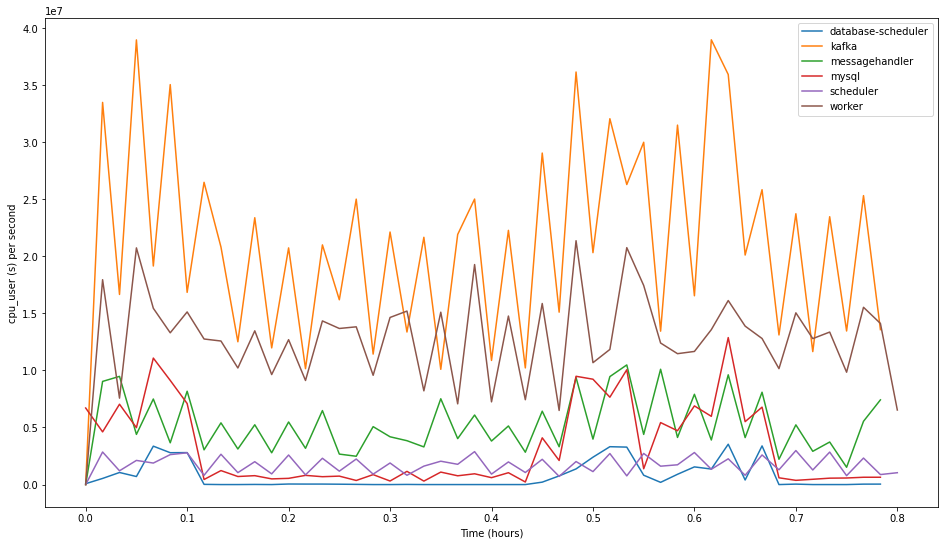

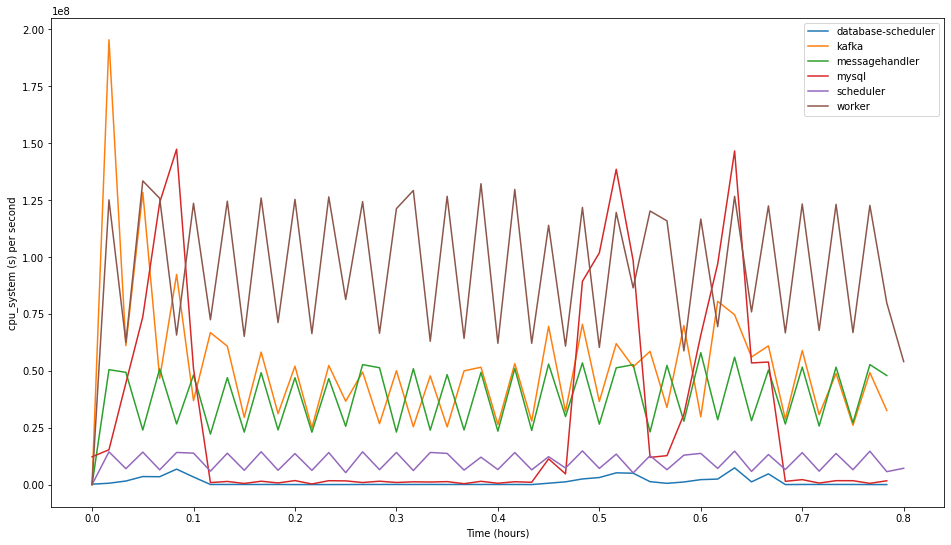

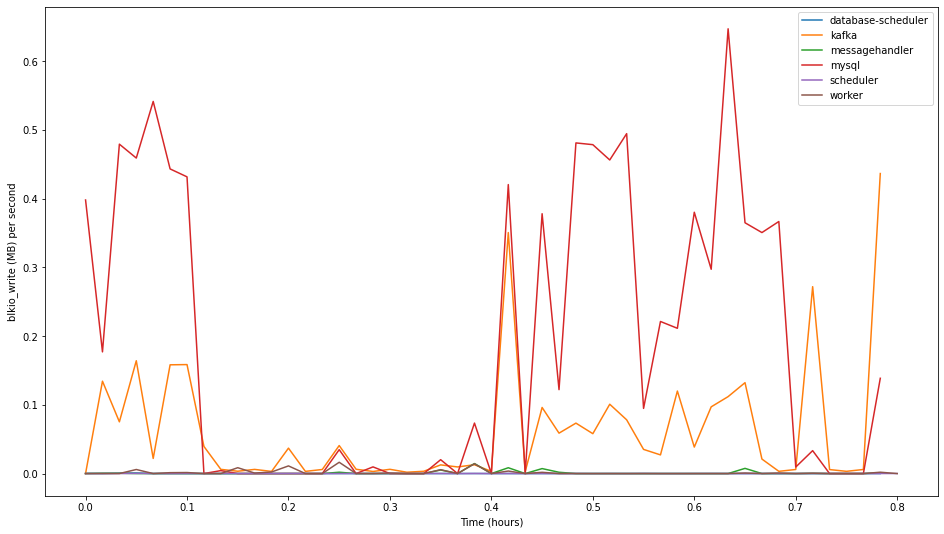

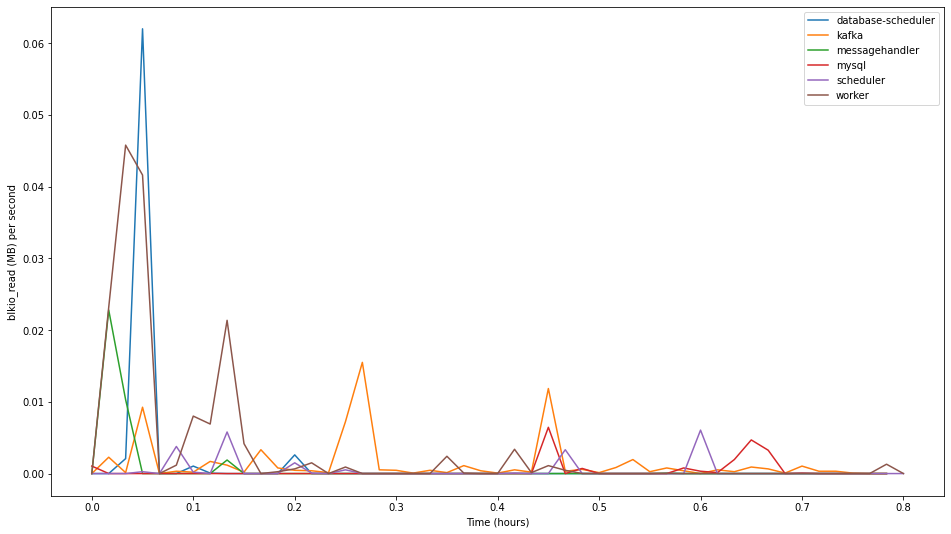

In [20]:
d_df = docker_df.copy()

result_path = "/mnt/Media Drive/Academics/Thesis/MessageScheduler/data/2022-06-07 11-03-05/result"
d_df.name = d_df.name.str.strip()
d_df['time'] = pd.to_datetime(d_df['time'])
d_df['timestamp'] = d_df['time'].dt.strftime('%Y-%m-%d %H:%M')
d_df['time'] = (d_df['time'] - d_df['time'].min()).astype('timedelta64[s]')/3600
d_df = d_df[d_df['name'].isin(['database-scheduler', 'mysql', 'messagehandler', 'worker', 'scheduler', 'kafka'])]

plot_numbers_list = ['pids', 'net_tx (MB)', 'net_rx (MB)',
       'memory_usage (MB)', 'cpu_user (s)', 'cpu_system (s)',
       'blkio_write (MB)', 'blkio_read (MB)']

# Absolute Readings
for col_name in [i for i in d_df.columns if i not in ["time", "name", "timestamp"]]:
    fig, ax = plt.subplots(figsize=(16, 9))
    for label, df in d_df.groupby('name'):
        df.plot(x='time', y=col_name, ax=ax, label=label)
    ax.set_ylabel(col_name)
    ax.set_xlabel("Time (hours)")
    plt.legend()
    plt.savefig(f'{result_path}/docker_{col_name}.pdf', bbox_inches='tight')


# Rate of change in values per second
for col_name in [i for i in d_df.columns if i not in ["time", "name", "timestamp"]]:
    fig, ax = plt.subplots(figsize=(16, 9))
    for label, df in d_df.groupby('name'):
        for p in plot_numbers_list:
            df[p] = df[p].diff()
        df = df[plot_numbers_list + ['timestamp']].groupby('timestamp').sum()/60
        df['timestamp'] = pd.to_datetime(df.index)
        df['time'] = (df['timestamp'] - df['timestamp'].min()).astype('timedelta64[s]')/3600
        df.plot(x='time', y=col_name, ax=ax, label=label)
    ax.set_ylabel(col_name + " per second")
    ax.set_xlabel("Time (hours)")
    plt.legend()
    plt.savefig(f'{result_path}/docker_{col_name}_per_sec.pdf', bbox_inches='tight')

In [84]:
for l, df in d_df.groupby('timestamp'):
    df.sum()

In [85]:
df

,time,pids,net_tx (MB),net_rx (MB),name,memory_usage (MB),cpu_user (s),cpu_system (s),blkio_write (MB),blkio_read (MB),timestamp
1100,0.796111,106,55.852511,61.826978,worker,20.339844,38425367000,282093765000,4.675781,10.683594,2022-06-07 11:03
1101,0.796667,5,29.016503,26.265497,scheduler,38.863281,5155213000,29888885000,0.386719,9.558594,2022-06-07 11:03
